In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

Lambda_idx = 0
nbins = 3000
# Lambda_idx = int(sys.argv[1])
# nbins = int(sys.argv[2])

Lambda = Lambdas[Lambda_idx]

# CCAT-prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 * (np.pi/180)**2 #rad^2
Pei = 2.3e4 #Mpc^3 kJy^2 /sr^2 
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)


oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, nbins)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_idx_0_from_quad_nbins_3000.npy


In [2]:
chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), nbins + 1)
chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
dchi = np.mean(np.diff(chi_bin_edges))



In [3]:
from scipy.interpolate import LinearNDInterpolator


In [4]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)


In [5]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [6]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [7]:
unfiltered_auto = np.zeros((100, nbins, nbins))
for i in trange(nbins):
    for j in range(nbins):
        unfiltered_auto[:, i, j] = f_unfiltered_auto(chi_bin_centers[i], chi_bin_centers[j])

100%|██████████| 3000/3000 [45:04<00:00,  1.11it/s]


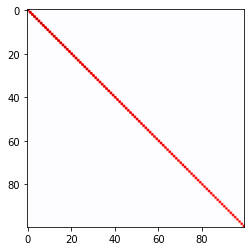

In [9]:
oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, 100)
cov = Pei * np.load(oup_fname)
vb = np.max(np.abs(cov))
plt.imshow(cov, vmin = -vb, vmax = vb, cmap='seismic')

1.3091628852793817e-05 2.139459786687462e-05


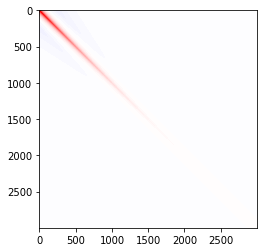

1.3100907030797328e-05 2.139459786687462e-05


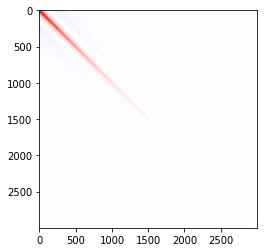

1.3110886195242575e-05 2.139459786687462e-05


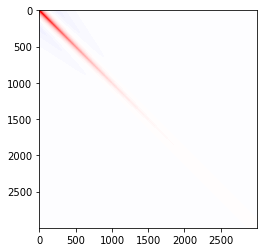

1.312159578139497e-05 2.139459786687462e-05


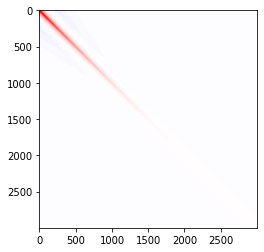

1.3133061773915501e-05 2.139459786687462e-05


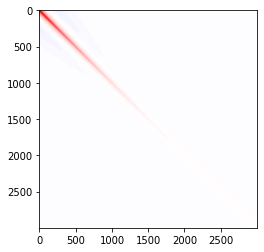

1.3145305393530184e-05 2.139459786687462e-05


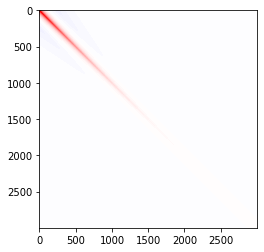

1.315834147759666e-05 2.139459786687462e-05


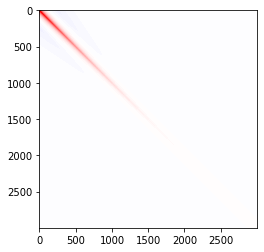

1.31721770529231e-05 2.139459786687462e-05


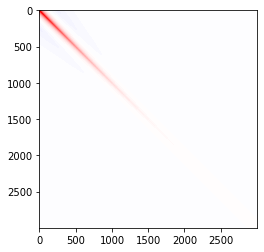

1.318680958101577e-05 2.139459786687462e-05


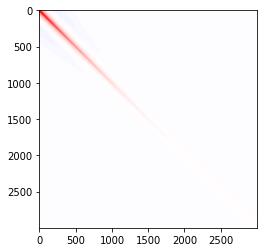

1.3202224769392814e-05 2.139459786687462e-05


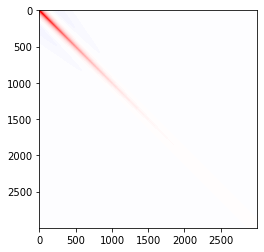

1.3218393961433001e-05 2.139459786687462e-05


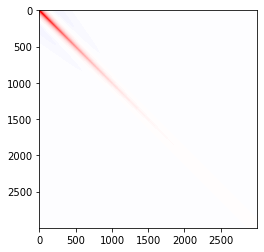

1.3235270853816829e-05 2.139459786687462e-05


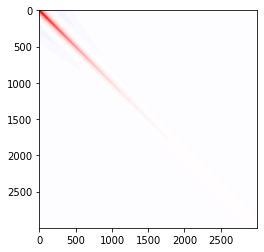

1.325278876360455e-05 2.139459786687462e-05


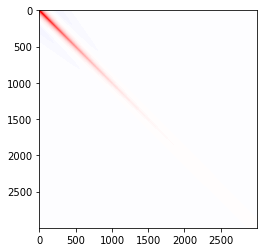

1.3270857035959272e-05 2.139459786687462e-05


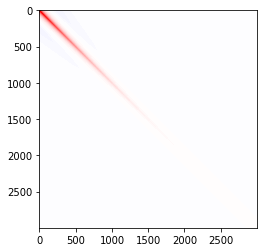

1.32893569925464e-05 2.139459786687462e-05


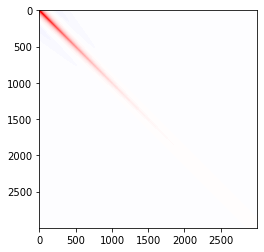

1.3308137656492049e-05 2.139459786687462e-05


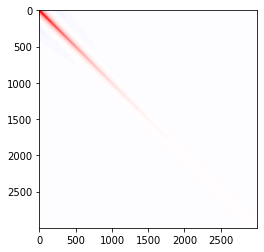

1.3327010874490085e-05 2.139459786687462e-05


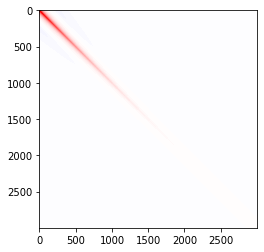

1.3345746187519999e-05 2.139459786687462e-05


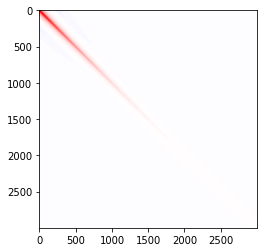

1.3364065454414429e-05 2.139459786687462e-05


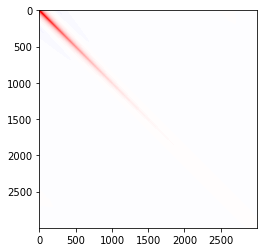

1.3381636898882327e-05 2.139459786687462e-05


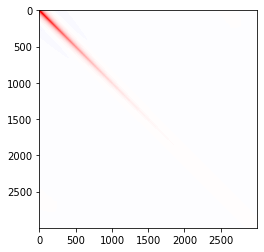

1.3398069071438921e-05 2.139459786687462e-05


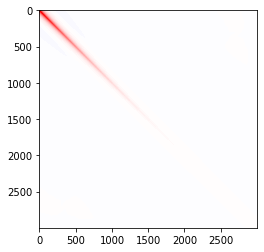

1.341290504911921e-05 2.139459786687462e-05


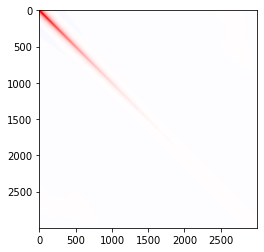

1.3425616073195408e-05 2.139459786687462e-05


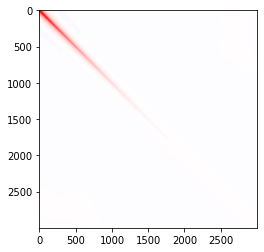

1.3435596077184406e-05 2.139459786687462e-05


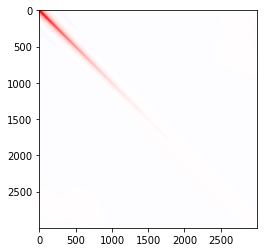

1.3442156744464116e-05 2.139459786687462e-05


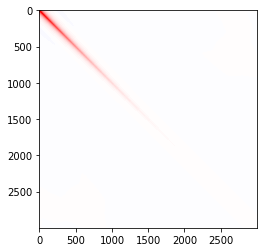

1.3444523562658494e-05 2.139459786687462e-05


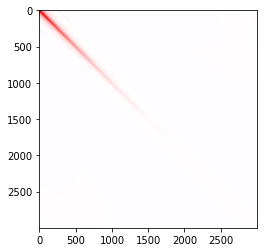

1.3441833443928258e-05 2.139459786687462e-05


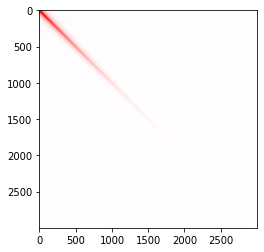

1.3433134950898804e-05 2.139459786687462e-05


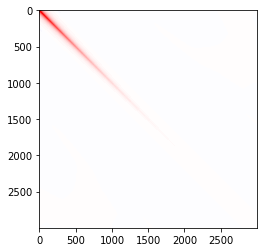

1.3417391291992964e-05 2.139459786687462e-05


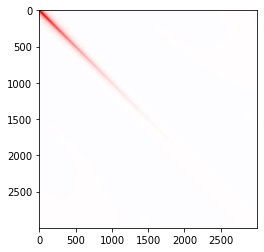

1.3393487745156696e-05 2.139459786687462e-05


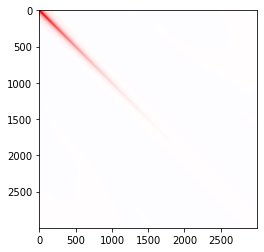

1.336024354875599e-05 2.139459786687462e-05


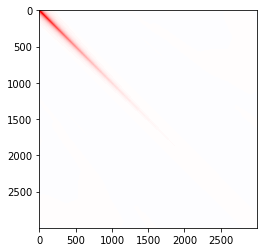

1.3316431496473613e-05 2.139459786687462e-05


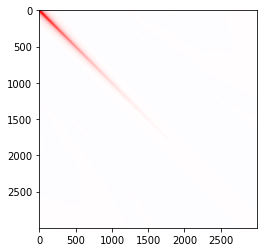

1.3260803902559467e-05 2.139459786687462e-05


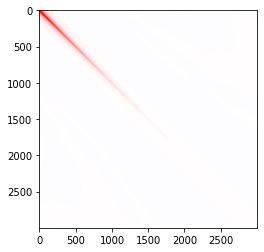

1.3192127977421766e-05 2.139459786687462e-05


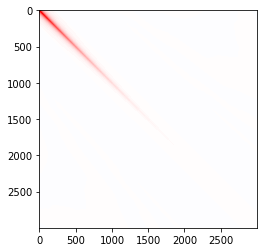

1.310923132308564e-05 2.139459786687462e-05


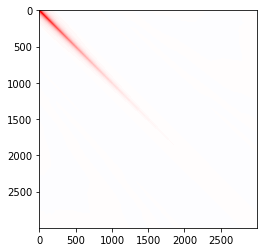

1.3011057196719323e-05 2.139459786687462e-05


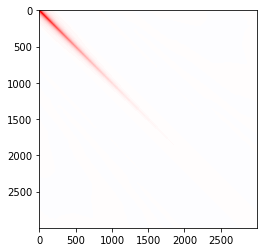

1.2896730582679938e-05 2.139459786687462e-05


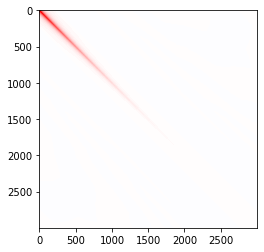

1.2765631542207187e-05 2.139459786687462e-05


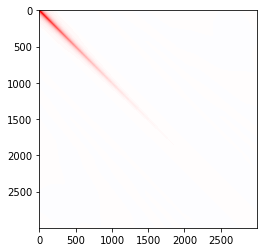

1.2617475893282758e-05 2.139459786687462e-05


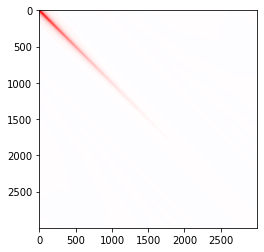

1.2452394363326692e-05 2.139459786687462e-05


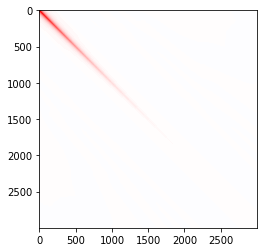

1.2271005567597295e-05 2.139459786687462e-05


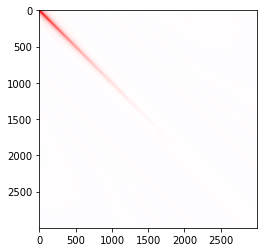

1.2074468974659306e-05 2.139459786687462e-05


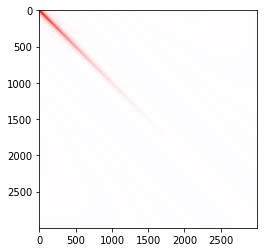

1.1864505283897395e-05 2.139459786687462e-05


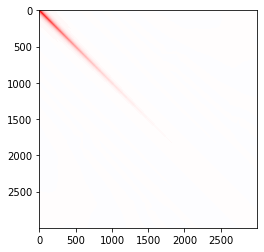

1.1643365192591011e-05 2.139459786687462e-05


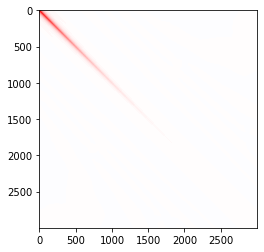

1.1413724243242739e-05 2.139459786687462e-05


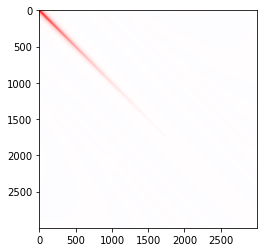

1.1178465355171305e-05 2.139459786687462e-05


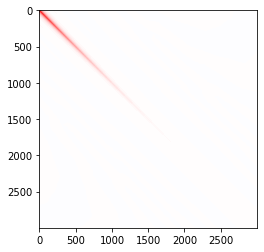

1.0940190538464188e-05 2.139459786687462e-05


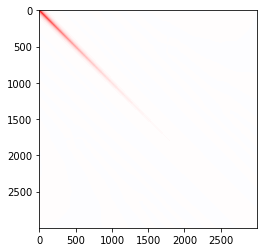

1.0702249743584303e-05 2.139459786687462e-05


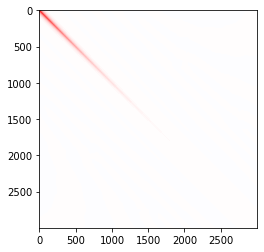

1.0467122108703552e-05 2.139459786687462e-05


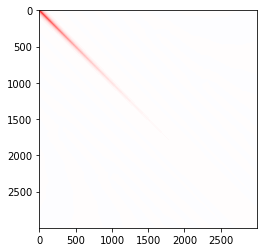

1.0235451164526533e-05 2.139459786687462e-05


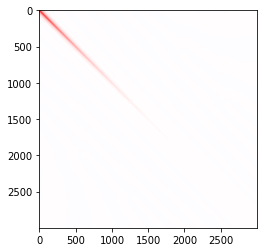

1.000596890022651e-05 2.139459786687462e-05


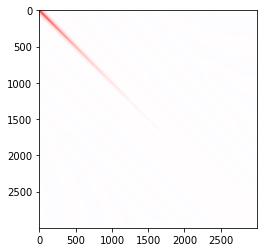

9.77566129667072e-06 2.139459786687462e-05


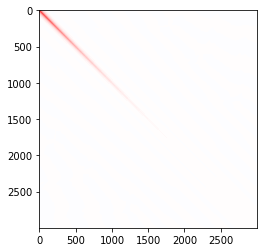

9.54037063245139e-06 2.139459786687462e-05


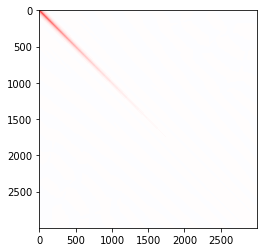

9.295883227824704e-06 2.139459786687462e-05


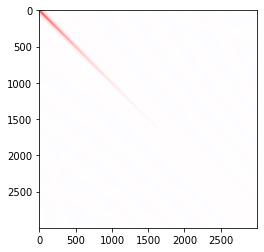

9.03268614513971e-06 2.139459786687462e-05


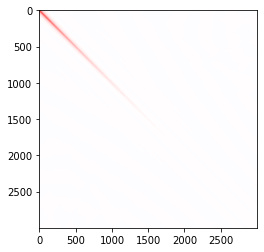

8.744627837633258e-06 2.139459786687462e-05


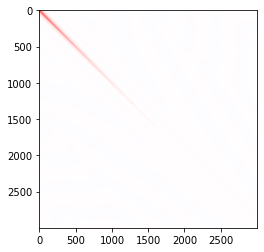

8.428731006664314e-06 2.139459786687462e-05


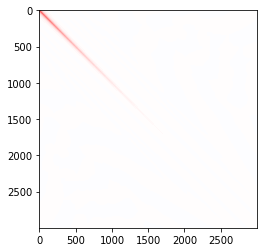

8.087207626990381e-06 2.139459786687462e-05


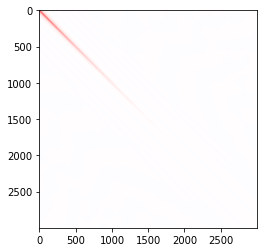

7.729300787481978e-06 2.139459786687462e-05


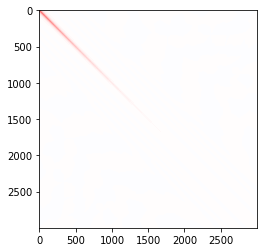

7.369786532209084e-06 2.139459786687462e-05


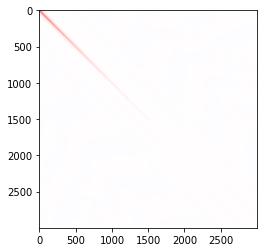

7.025301808771389e-06 2.139459786687462e-05


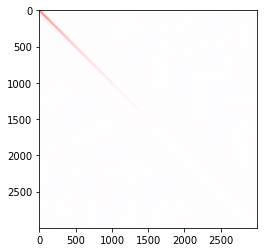

6.709901092737788e-06 2.139459786687462e-05


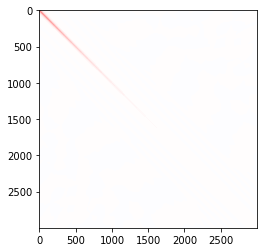

6.429367804054444e-06 2.139459786687462e-05


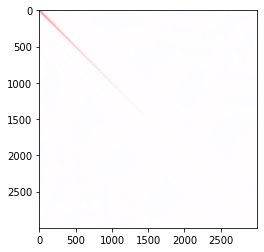

6.176319155574907e-06 2.139459786687462e-05


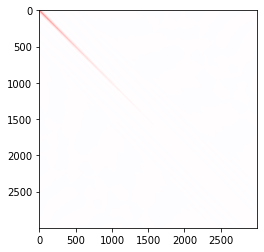

5.931689847856192e-06 2.139459786687462e-05


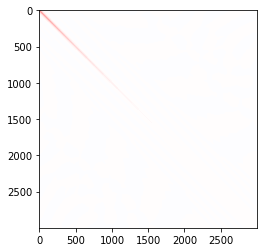

5.672105945097027e-06 2.139459786687462e-05


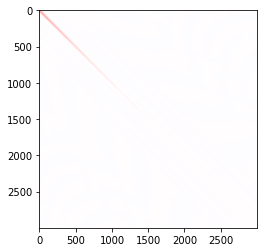

5.381837416628765e-06 2.139459786687462e-05


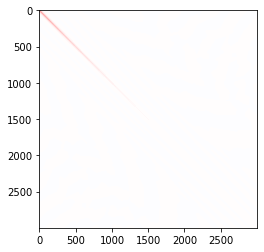

5.069423602166776e-06 2.139459786687462e-05


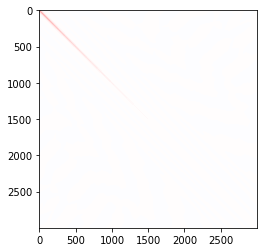

4.764831816780386e-06 2.139459786687462e-05


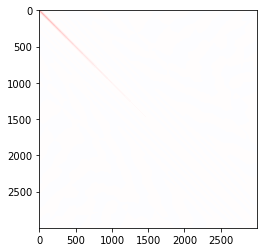

4.495480202849177e-06 2.139459786687462e-05


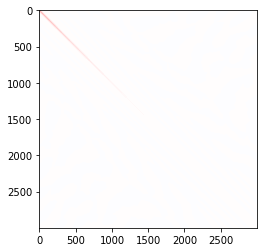

4.267008292096378e-06 2.139459786687462e-05


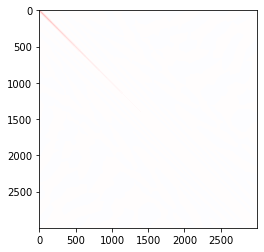

4.053711370228527e-06 2.139459786687462e-05


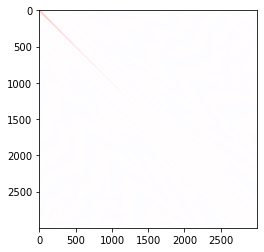

3.82503790511011e-06 2.139459786687462e-05


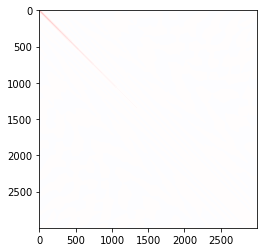

3.5789519812375827e-06 2.139459786687462e-05


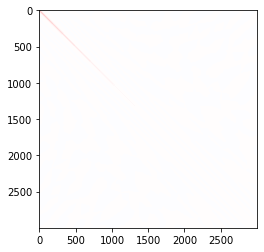

3.3456321276303915e-06 2.139459786687462e-05


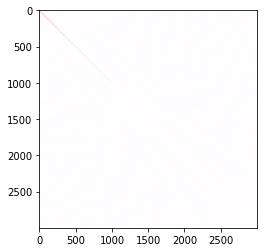

3.1459171248165513e-06 2.139459786687462e-05


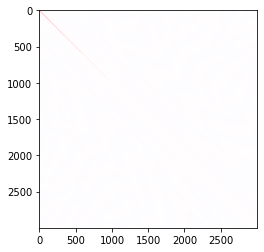

2.961904906838192e-06 2.139459786687462e-05


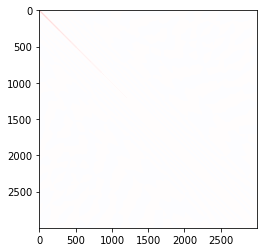

2.769476188407167e-06 2.139459786687462e-05


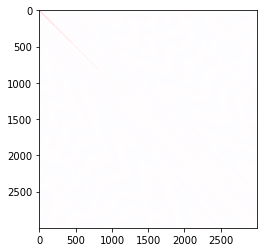

2.5795229072967603e-06 2.139459786687462e-05


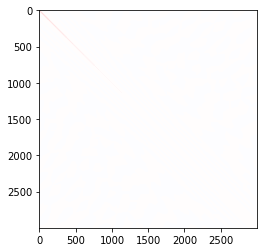

2.4113957975347236e-06 2.139459786687462e-05


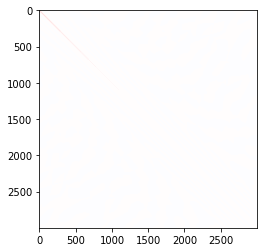

2.253671405653339e-06 2.139459786687462e-05


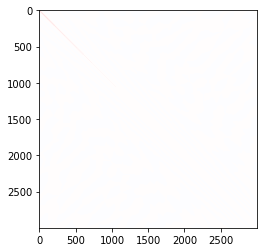

2.0958187007300988e-06 2.139459786687462e-05


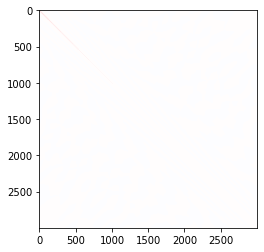

1.950007135142238e-06 2.139459786687462e-05


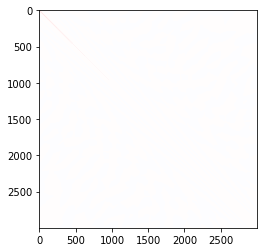

1.8147307226070914e-06 2.139459786687462e-05


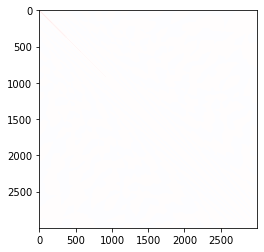

1.6837651353881968e-06 2.139459786687462e-05


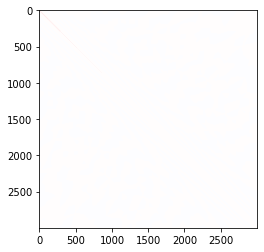

1.5625644130097579e-06 2.139459786687462e-05


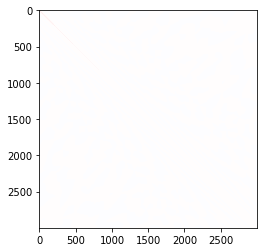

1.4482068717065983e-06 2.139459786687462e-05


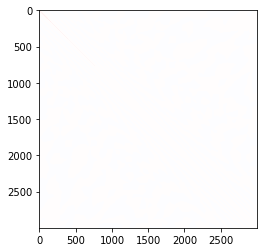

1.340775370533216e-06 2.139459786687462e-05


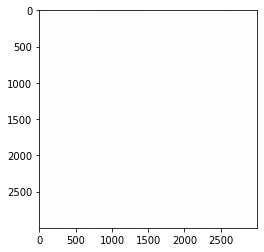

1.240438614427201e-06 2.139459786687462e-05


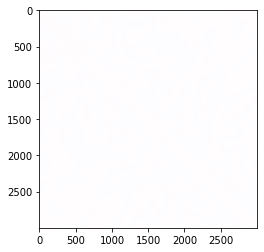

1.1463550314342757e-06 2.139459786687462e-05


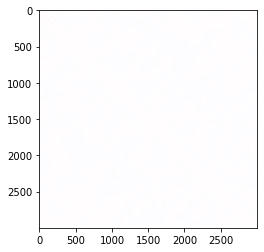

1.058581785185826e-06 2.139459786687462e-05


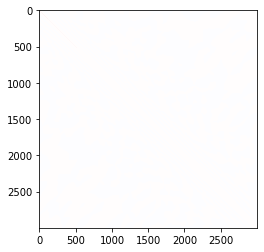

9.76653156734246e-07 2.139459786687462e-05


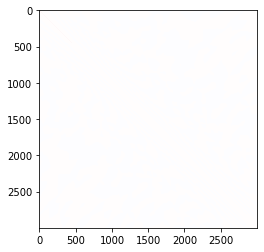

9.003311607930564e-07 2.139459786687462e-05


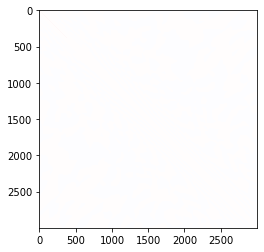

8.29245402601108e-07 2.139459786687462e-05


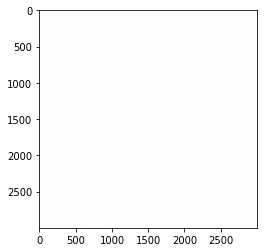

7.63156553222171e-07 2.139459786687462e-05


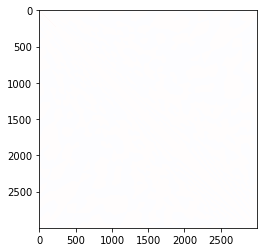

7.018053509503302e-07 2.139459786687462e-05


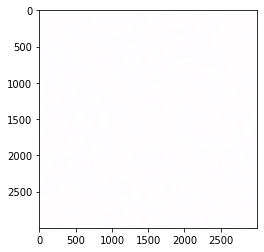

6.449122224665551e-07 2.139459786687462e-05


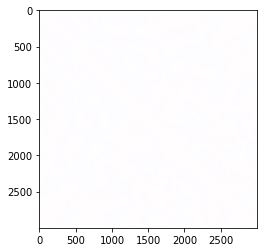

5.921985934083214e-07 2.139459786687462e-05


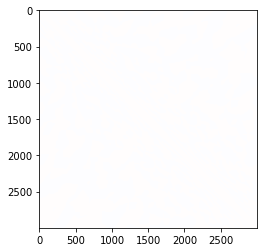

5.434008831448958e-07 2.139459786687462e-05


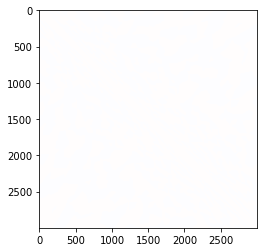

4.98271405705403e-07 2.139459786687462e-05


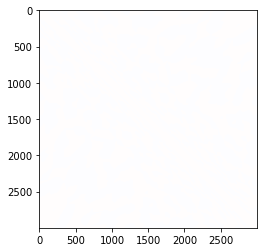

In [10]:
for ell_idx in range(len(ells)):
#     tmb_vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()

In [11]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_nbins_%d_zmin_%.1f_zmax_%.1f.npy'%(nbins, zmin, zmax), unfiltered_auto)